**Titanic: Machine Learning from Disaster**<br />
Start here! Predict survival on the Titanic and get familiar with ML basics

**Library imports**

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Seaborn for plotting and styling
import seaborn as sns
sns.set()
sns.set_palette('muted')

In [5]:
# Stats tests
from scipy.stats.stats import pearsonr

In [7]:
# ML Algos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, log_loss,\
                            confusion_matrix, matthews_corrcoef, \
                            precision_score, recall_score
from sklearn.externals import joblib

**Data import**

In [41]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission_example = pd.read_csv('data/gender_submission.csv')

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 270.8 KB


In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
submission_example.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


**Exploratory Analysis**

In [13]:
# NULL counts
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

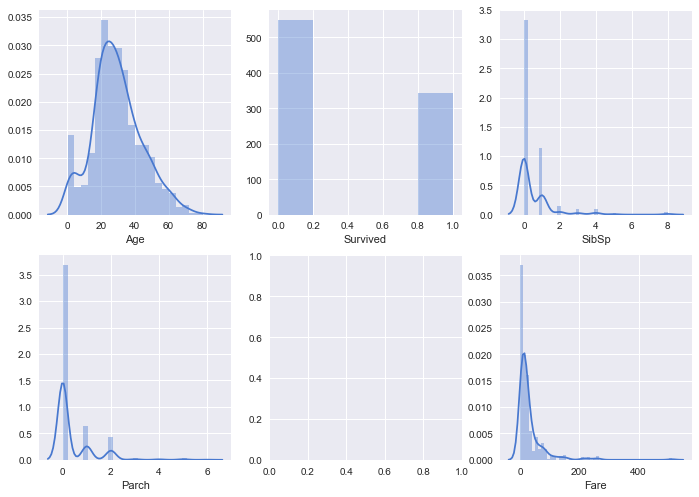

In [14]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax5,)) = plt.subplots(2, 3)
f.set_size_inches(11.7, 8.27)
sns.distplot(train['Age'][~train['Age'].isnull()], ax=ax1)
sns.distplot(train['Survived'], kde=False, ax=ax2)
sns.distplot(train['SibSp'], ax=ax3)
sns.distplot(train['Parch'], ax=ax4)
sns.distplot(train['Fare'], ax=ax5)

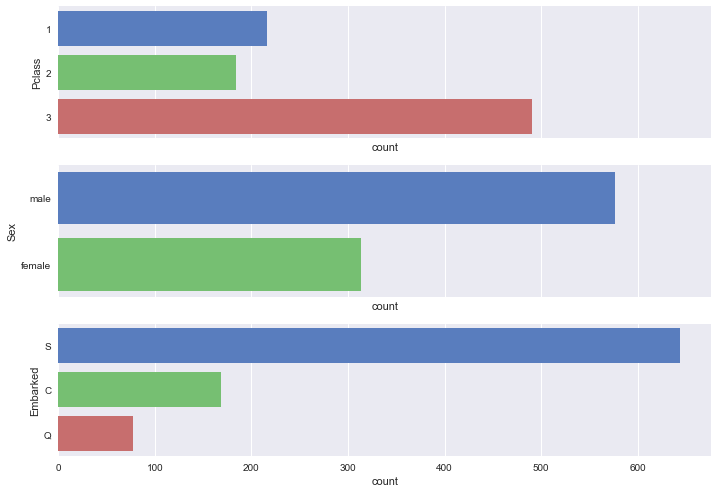

In [15]:
f, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, sharex=True)
f.set_size_inches(11.7, 8.27)
sns.countplot(y="Pclass", data=train, ax=ax1)
sns.countplot(y="Sex", data=train, ax=ax2)
sns.countplot(y="Embarked", data=train, ax=ax3)

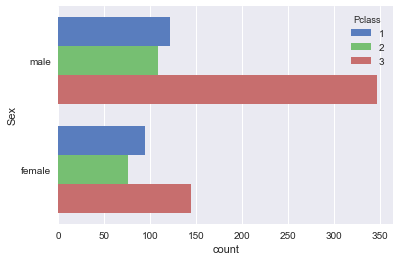

In [16]:
sns.countplot(y='Sex', hue='Pclass', data=train)

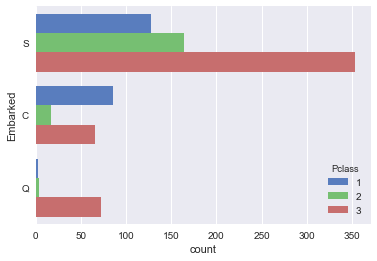

In [17]:
sns.countplot(y='Embarked', hue='Pclass', data=train)

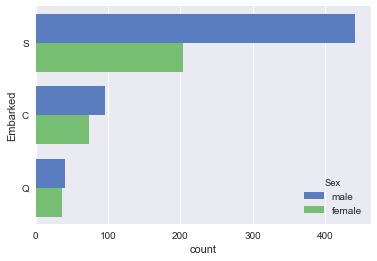

In [18]:
sns.countplot(y='Embarked', hue='Sex', data=train)

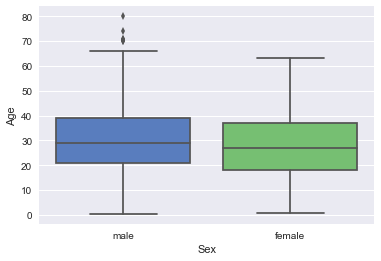

In [19]:
sns.boxplot(x="Sex", y="Age", data=train)

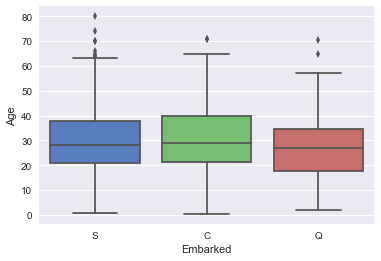

In [20]:
sns.boxplot(x="Embarked", y="Age", data=train)

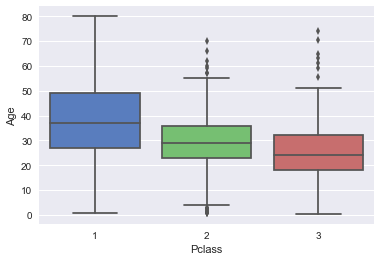

In [21]:
sns.boxplot(x="Pclass", y="Age", data=train)

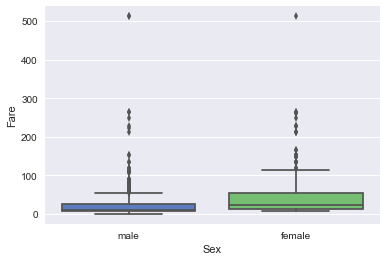

In [22]:
sns.boxplot(x="Sex", y="Fare", data=train)

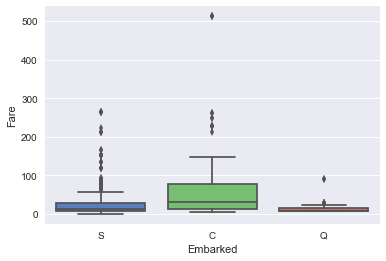

In [23]:
sns.boxplot(x="Embarked", y="Fare", data=train)

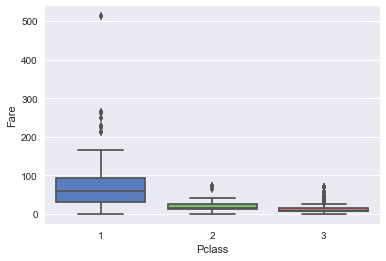

In [24]:
sns.boxplot(x="Pclass", y="Fare", data=train)

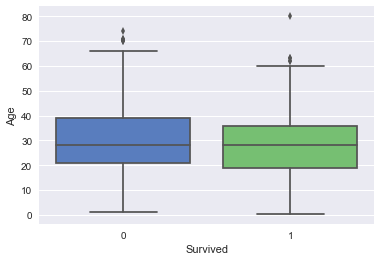

In [25]:
sns.boxplot(x="Survived", y="Age", data=train)

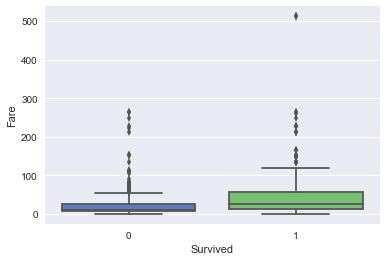

In [26]:
sns.boxplot(x="Survived", y="Fare", data=train)

In [27]:
# What does 'Cabin' look like?
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
# Maybe treat as categorical?
print train['SibSp'].unique()
print train['Parch'].unique()

[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]


**Data cleaning**

In [29]:
def ingest(train, test):
    test['Survived'] = 999
    data = pd.concat([train, test])
    return data

In [30]:
def null_check(df):
    return list(data.columns[data.isnull().any()])
    data[null_columns].isnull().sum()

In [31]:
def clean(df):
    # Handling null values for numeric columns
    df['fare_none'] = np.where(df['Fare'].isnull(), 1, 0).astype('uint8')
    df['Fare'] = df['Fare'].fillna(0).astype('uint8')
    df['age_none'] = np.where(df['Age'].isnull(), 1, 0).astype('uint8')
    df['Age'] = df['Age'].fillna(-1)

    # Handling null values for categorical columns
    df['Embarked'] = df['Embarked'].fillna('none')

    return df

**Descriptive Statistical Test**

In [44]:
def corr(df, target):
    cols = list(df.columns)
    corrs = []
    for col in cols:
        corr = pearsonr(df[col], target)
        d = {
            'column': col,
            'pearson_corr': corr[0],
            'p_val': corr[1],
        }
        corrs.append(d)
    
    corrs = sorted(corrs, key=lambda k: k['pearson_corr'], reverse=True)
    return corrs

**Feature engineering**

In [32]:
def feature_engineer(df):
    #df['SibSp'] = np.where(df['SibSp'] > 0, 1, 0)
    #df['Parch'] = np.where(df['Parch'] > 0, 1, 0)

    df['age_est'] = df['Age'].apply(lambda x: 1 if x.is_integer() == False and x > 1 else 0)
    df['child'] = df['Age'].apply(lambda x: 1 if x <= 14 and x >= 0 else 0)
    df['alone'] = np.where((df['Parch'] + df['SibSp'] == 0), 1, 0)
    df['nanny'] = np.where((df['Parch'] == 0) & (df['child'] == 1), 1, 0)
    #df['cabin_letter'] = df['Cabin'].str[:1].fillna('none')
    df['title'] = df['Name'].apply(lambda x: x[(x.find(',') + 2):(x.find('.'))])

    # One-hot encode categorical columns
    categorical_cols = [
        'Pclass',
        'Sex',
        'Embarked',
        #'cabin_letter',
        'title',
    ]

    df = pd.get_dummies(df, columns=categorical_cols)

    drop_cols = [
        'Name',
        'Ticket',
        'Cabin',
    ]

    df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

    return df

**Train and validation split**

In [33]:
def split(df, label, feature_select=None):

    if feature_select:
        feature_select = feature_select + ['PassengerId', label]
        df = df[feature_select]

    # Split train and test data
    train = df[df[label] != 999]
    test =  df[df[label] == 999]

    X_test = test.drop([label], axis=1)

    # Train and validation split
    y_train = train[label]
    X_train = train.drop([label, 'PassengerId'], axis=1)

    return X_train, y_train, X_test

**Model selection**

In [34]:
def _eval_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print 'r2: {}'.format(r2)
    print 'rmse: {}'.format(rmse)
    print 'mcc: {}'.format(mcc)
    print 'precision: {}'.format(precision)
    print 'recall: {}'.format(recall)

In [35]:
def model_selection(X, y, models, hyperparams, cross_val=10):
    X_train, X_holdout, y_train, y_holdout = (train_test_split(
        X, y,
        test_size=0.2,
        random_state=123,
        stratify=y,
    ))

    out = {}
    keys = ['model', 'tuned_params']

    for name, model in models.iteritems():
        pipeline = make_pipeline(preprocessing.StandardScaler(), model)
        clf = GridSearchCV(pipeline, hyperparams[name], cv=cross_val)
        clf.fit(X_train, y_train)
        tuned_params = clf.best_params_
        pred = clf.predict(X_holdout)
        print '\n- {}'.format(name)
        _eval_metrics(y_holdout, pred)

        vals = [clf, tuned_params]
        out[name] = (dict(zip(keys, vals)))

    return out

**Models and Hyperparameters**

In [36]:
models = {
    'logistic_regression': LogisticRegression(max_iter=10),
    'decision_tree': DecisionTreeClassifier(random_state=0),
    'random_forest': RandomForestClassifier(random_state=0),
}

In [37]:
hyperparams = {
    'logistic_regression': {
        'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'logisticregression__C': [0.1, 0.5, 1, 5, 10, 50, 100],
        'logisticregression__max_iter': [1000, 100, 50],
    },
    'decision_tree': {
        'decisiontreeclassifier__max_depth': [None, 5, 15, 30],
        'decisiontreeclassifier__criterion': ['gini', 'entropy'],
        'decisiontreeclassifier__min_samples_split': [2, 5, 10, 15, 100],
        'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 10],
        'decisiontreeclassifier__max_features': [None, 'log2', 'sqrt'],
    },
    'random_forest': {
        'randomforestclassifier__max_features' : ['auto', 'sqrt', 'log2'],
        'randomforestclassifier__max_depth': [None, 5, 3, 1]
    },
}

In [38]:
feature_select = [
    'Sex_female',
    'title_Mrs',
    'title_Miss',
    'Pclass_1',
    'Fare',
    'Embarked_C',
    'alone',
    'Pclass_3',
    'Sex_male',
    'title_Mr',
]

**Run pipeline**

In [42]:
data = ingest(train, test)
data = clean(data)
data = feature_engineer(data)
#X, y, X_test = split(data, 'Survived', feature_select)
X, y, X_test = split(data, 'Survived')

In [43]:
trained_models = model_selection(X, y, models, hyperparams)


- decision_tree
r2: 0.033069828722
rmse: 0.22905027933
mcc: 0.527238848479
precision: 0.684210526316
recall: 0.753623188406

- logistic_regression
r2: 0.316073781291
rmse: 0.162011173184
mcc: 0.653764916609
precision: 0.822580645161
recall: 0.739130434783

- random_forest
r2: 0.198155467721
rmse: 0.189944134078
mcc: 0.592314415335
precision: 0.796610169492
recall: 0.68115942029


In [45]:
# Create submission
ids = X_test['PassengerId']
pred_test = trained_models['logistic_regression']['model'].predict(X_test.drop(['PassengerId'], axis=1))
submission = pd.DataFrame({'PassengerId': ids, 'Survived': pred_test})
submission.head()
submission.to_csv('data/titanic-predictions.csv', index=False)